In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import xgboost as xg
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import RidgeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import metrics as ms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
df = pd.read_excel('Final_Data.xlsx', sheet_name='Train')

In [3]:
df.columns

Index(['Person_id', 'Survey_date', 'Round', 'Status', 'Tenure', 'Geography',
       'Province', 'Matric', 'Degree', 'Diploma', 'Higher_Education',
       'Schoolquintile', 'Math', 'Mathlit', 'Mathematics', 'Additional_lang',
       'Home_lang', 'Language', 'Science', 'Female', 'Sa_citizen', 'Birthyear',
       'Birthmonth', 'Target'],
      dtype='object')

In [4]:
df.rename(columns = {'Female':'Gender'}, inplace = True)

In [5]:
df['Age'] = df['Survey_date'].dt.year - df['Birthyear']

In [6]:
df.drop(columns=['Survey_date', 'Round', 'Degree', 'Diploma', 'Math', 'Mathlit','Additional_lang',
                 'Home_lang', 'Sa_citizen', 'Birthyear'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Person_id         4020 non-null   object 
 1   Status            4020 non-null   object 
 2   Tenure            2626 non-null   float64
 3   Geography         4020 non-null   object 
 4   Province          4020 non-null   object 
 5   Matric            4020 non-null   int64  
 6   Higher_Education  4020 non-null   int64  
 7   Schoolquintile    3367 non-null   float64
 8   Mathematics       2350 non-null   object 
 9   Language          2399 non-null   object 
 10  Science           732 non-null    object 
 11  Gender            4020 non-null   int64  
 12  Birthmonth        4020 non-null   int64  
 13  Target            4020 non-null   int64  
 14  Age               4020 non-null   int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 471.2+ KB


In [8]:
print('Numeric info for Tenure: \n')
print('Minimum value: ', df['Tenure'].min(), '\n')
print('Median value: ', df['Tenure'].median(), '\n')
print('Maximum value: ', df['Tenure'].max(), '\n')
print('Mode value: ', df['Tenure'].mode(), '\n')

mean = df['Tenure'].mean()
print('mean value: ', mean.round())

Numeric info for Tenure: 

Minimum value:  0.0 

Median value:  395.0 

Maximum value:  3560.0 

Mode value:  0    0.0
Name: Tenure, dtype: float64 

mean value:  583.0


In [9]:
print('Numeric info for Schoolquintile: \n')
print('Minimum value: ', df['Schoolquintile'].min(), '\n')
print('Median value: ', df['Schoolquintile'].median(), '\n')
print('Maximum value: ', df['Schoolquintile'].max(), '\n')
print('Mode value: ', df['Schoolquintile'].mode(), '\n')

mean = df['Schoolquintile'].mean()
print('mean value: ', mean.round())

Numeric info for Schoolquintile: 

Minimum value:  0.0 

Median value:  2.0 

Maximum value:  5.0 

Mode value:  0    0.0
Name: Schoolquintile, dtype: float64 

mean value:  2.0


In [10]:
df['Tenure'].fillna(583.0, inplace=True)
df['Mathematics'].fillna('unknown', inplace=True)
df['Schoolquintile'].fillna(2.0, inplace=True)
df['Language'].fillna('unknown', inplace=True)
df['Science'].fillna('unknown', inplace=True)
df

,Person_id,Status,Tenure,Geography,Province,Matric,Higher_Education,Schoolquintile,Mathematics,Language,Science,Gender,Birthmonth,Target,Age
0,Id_eqz61wz7yn,studying,583.0,Rural,Mpumalanga,1,0,3.0,0 - 29 %,50 - 59 %,0 - 29 %,1,5,0,22
1,Id_kj5k3g5wud,unemployed,427.0,Suburb,North West,1,0,1.0,30 - 39 %,40 - 49 %,30 - 39 %,1,4,1,34
2,Id_9h0isj38y4,other,583.0,Urban,Free State,1,0,2.0,30 - 39 %,40 - 49 %,30 - 39 %,0,7,1,26
3,Id_5ch3zwpdef,unemployed,810.0,Urban,Eastern Cape,0,0,0.0,unknown,unknown,unknown,0,1,0,22
4,Id_g4elxibjej,studying,583.0,Urban,Limpopo,0,0,0.0,unknown,unknown,unknown,1,12,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4015,Id_3lxfvtmbkr,wage employed,273.0,Rural,Limpopo,1,0,2.0,40 - 49 %,50 - 59 %,unknown,1,1,0,23
4016,Id_u3uc3v9pts,unemployed,401.0,Urban,Gauteng,1,1,2.0,40 - 49 %,60 - 69 %,unknown,0,3,0,24
4017,Id_enkksj5q5r,unemployed,2287.0,Urban,KwaZulu-Natal,0,0,1.0,unknown,unknown,unknown,1,10,0,32
4018,Id_3rtpd7kc1g,studying,583.0,Urban,Eastern Cape,1,0,3.0,40 - 49 %,60 - 69 %,50 - 59 %,1,1,1,22


In [11]:
df.isnull().sum()

Person_id           0
Status              0
Tenure              0
Geography           0
Province            0
Matric              0
Higher_Education    0
Schoolquintile      0
Mathematics         0
Language            0
Science             0
Gender              0
Birthmonth          0
Target              0
Age                 0
dtype: int64

In [12]:
df.skew()

/var/folders/dt/6wlrtxmd13nfmwf1shtvq5t40000gq/T/ipykernel_96641/1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Tenure              1.964297
Matric             -0.571430
Higher_Education    2.924900
Schoolquintile      0.308931
Gender             -0.259975
Birthmonth          0.302052
Target              1.025746
Age                 1.208625
dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Person_id         4020 non-null   object 
 1   Status            4020 non-null   object 
 2   Tenure            4020 non-null   float64
 3   Geography         4020 non-null   object 
 4   Province          4020 non-null   object 
 5   Matric            4020 non-null   int64  
 6   Higher_Education  4020 non-null   int64  
 7   Schoolquintile    4020 non-null   float64
 8   Mathematics       4020 non-null   object 
 9   Language          4020 non-null   object 
 10  Science           4020 non-null   object 
 11  Gender            4020 non-null   int64  
 12  Birthmonth        4020 non-null   int64  
 13  Target            4020 non-null   int64  
 14  Age               4020 non-null   int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 471.2+ KB


In [14]:
df = df.astype({'Person_id':'string', 'Status':'string', 'Tenure':'float', 'Geography':'string', 
                'Province':'string', 'Higher_Education':'float', 'Schoolquintile':'float', 'Mathematics':'string',
                'Language':'string', 'Science':'string', 'Gender':'float', 'Birthmonth':'float','Target':'float',
                'Age':'float'})

In [15]:
df['Gender'].value_counts()

1.0    2269
0.0    1751
Name: Gender, dtype: int64

In [16]:
df['Status'].value_counts()

unemployed                1775
studying                   966
wage employed              763
other                      278
self employed              200
employment programme        31
wage and self employed       7
Name: Status, dtype: Int64

In [17]:
df['Schoolquintile'].value_counts()

2.0    1157
0.0    1075
3.0     739
1.0     445
4.0     329
5.0     275
Name: Schoolquintile, dtype: int64

In [18]:
df['Higher_Education'].value_counts()

0.0    3669
1.0     351
Name: Higher_Education, dtype: int64

In [19]:
df['Geography'].value_counts()

Urban     2797
Rural      803
Suburb     420
Name: Geography, dtype: Int64

# EDA

In [20]:
from pivottablejs import pivot_ui

In [21]:
df

,Person_id,Status,Tenure,Geography,Province,Matric,Higher_Education,Schoolquintile,Mathematics,Language,Science,Gender,Birthmonth,Target,Age
0,Id_eqz61wz7yn,studying,583.0,Rural,Mpumalanga,1,0.0,3.0,0 - 29 %,50 - 59 %,0 - 29 %,1.0,5.0,0.0,22.0
1,Id_kj5k3g5wud,unemployed,427.0,Suburb,North West,1,0.0,1.0,30 - 39 %,40 - 49 %,30 - 39 %,1.0,4.0,1.0,34.0
2,Id_9h0isj38y4,other,583.0,Urban,Free State,1,0.0,2.0,30 - 39 %,40 - 49 %,30 - 39 %,0.0,7.0,1.0,26.0
3,Id_5ch3zwpdef,unemployed,810.0,Urban,Eastern Cape,0,0.0,0.0,unknown,unknown,unknown,0.0,1.0,0.0,22.0
4,Id_g4elxibjej,studying,583.0,Urban,Limpopo,0,0.0,0.0,unknown,unknown,unknown,1.0,12.0,0.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4015,Id_3lxfvtmbkr,wage employed,273.0,Rural,Limpopo,1,0.0,2.0,40 - 49 %,50 - 59 %,unknown,1.0,1.0,0.0,23.0
4016,Id_u3uc3v9pts,unemployed,401.0,Urban,Gauteng,1,1.0,2.0,40 - 49 %,60 - 69 %,unknown,0.0,3.0,0.0,24.0
4017,Id_enkksj5q5r,unemployed,2287.0,Urban,KwaZulu-Natal,0,0.0,1.0,unknown,unknown,unknown,1.0,10.0,0.0,32.0
4018,Id_3rtpd7kc1g,studying,583.0,Urban,Eastern Cape,1,0.0,3.0,40 - 49 %,60 - 69 %,50 - 59 %,1.0,1.0,1.0,22.0


In [22]:
pivot_ui(df)

## Correlation

/var/folders/dt/6wlrtxmd13nfmwf1shtvq5t40000gq/T/ipykernel_96641/1479007483.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths= 0.5)


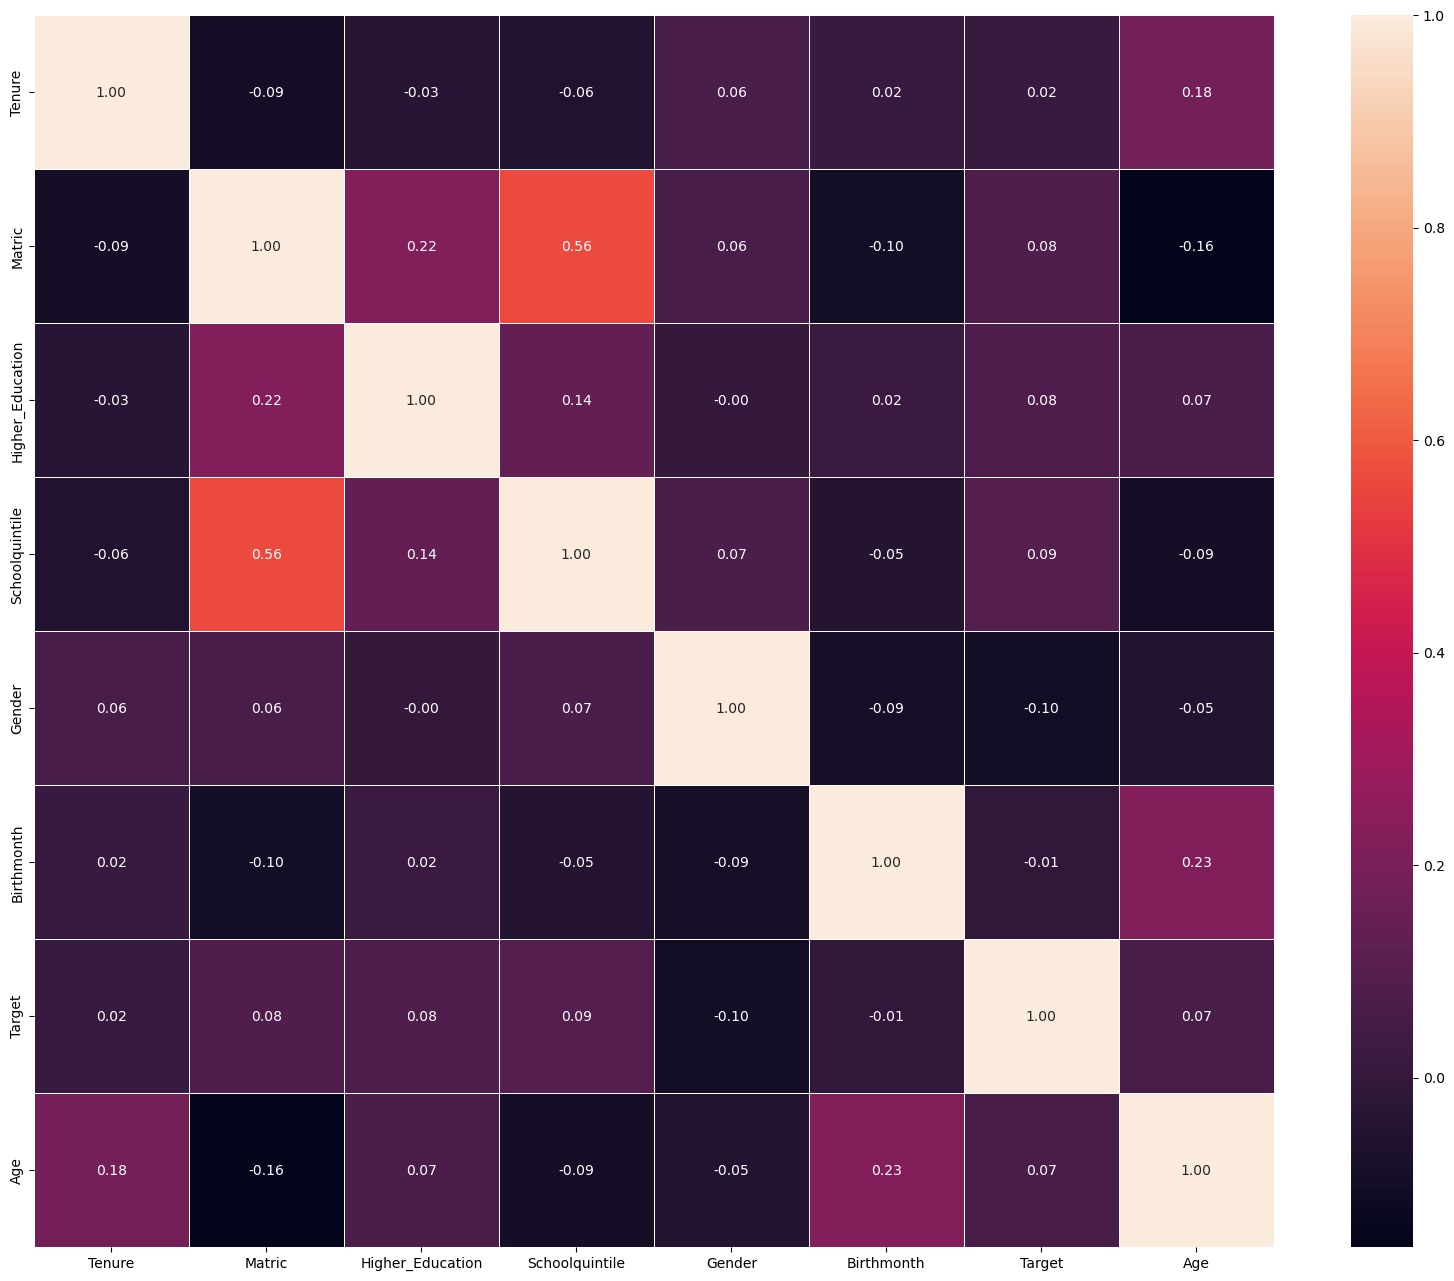

In [23]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths= 0.5)
plt.show()

In [24]:
label_encoder = LabelEncoder()

# Iterate over each column in the DataFrame and encode the values
for col in df.columns:
    df[col] = label_encoder.fit_transform(df[col])

In [25]:
df[df.Target==1]

,Person_id,Status,Tenure,Geography,Province,Matric,Higher_Education,Schoolquintile,Mathematics,Language,Science,Gender,Birthmonth,Target,Age
1,2269,4,224,1,6,1,0,1,1,1,1,1,3,1,16
2,1016,1,283,2,1,1,0,2,1,1,1,0,6,1,8
9,2510,2,556,0,4,0,0,0,7,6,7,0,3,1,14
10,1899,1,283,2,2,1,0,2,1,2,2,1,8,1,5
12,3693,3,283,2,3,1,0,4,4,3,4,0,8,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4006,574,1,283,2,1,1,0,5,3,2,7,1,9,1,4
4007,237,1,283,2,2,1,1,3,1,3,0,0,2,1,7
4012,2071,2,393,2,0,0,0,0,7,6,7,0,2,1,5
4018,429,3,283,2,0,1,0,3,2,3,3,1,0,1,4


In [26]:
X = df[[
    'Status', 'Geography', 'Higher_Education', 'Matric', 'Gender'
]]

# X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)

Training set shape: (3216, 5) (3216,)


## Univariate Selection

In [27]:
x = X_train
y = y_train

# Create a DataFrame to store the column names of the feature matrix X_train
names = pd.DataFrame(X_train.columns)

model = SelectKBest(score_func=f_regression, k=4)
results = model.fit(x, y)

print(results.scores_)
# print(results.pvalues_)

results_df = pd.DataFrame(results.scores_)
# Concat and name columns
scored = pd.concat([names, results_df], axis=1)
scored.columns = ["Feature", "Score"]
scored.sort_values(by=['Score'], inplace=True)  # Sort by score in ascending order

print(scored)

[300.19500392   9.51898868  18.22015933  15.79404137  39.73709698]
            Feature       Score
1         Geography    9.518989
3            Matric   15.794041
2  Higher_Education   18.220159
4            Gender   39.737097
0            Status  300.195004


## Univariate Selection

In [28]:
x = X_train
y = y_train

# Create a DataFrame to store the column names of the feature matrix X_train
names = pd.DataFrame(X_train.columns)

model = SelectKBest(score_func=f_regression, k=4)
results = model.fit(x, y)

print(results.scores_)
# print(results.pvalues_)

results_df = pd.DataFrame(results.scores_)
# Concat and name columns
scored = pd.concat([names, results_df], axis=1)
scored.columns = ["Feature", "Score"]
scored.sort_values(by=['Score'], inplace=True)  # Sort by score in ascending order

print(scored)

[300.19500392   9.51898868  18.22015933  15.79404137  39.73709698]
            Feature       Score
1         Geography    9.518989
3            Matric   15.794041
2  Higher_Education   18.220159
4            Gender   39.737097
0            Status  300.195004


## Multicollinearity

In [29]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Check for multicollinearity
print(vif)

           Features       VIF
0            Status  4.132224
1         Geography  3.458377
2  Higher_Education  1.155643
3            Matric  2.621180
4            Gender  2.163102


## Backward Feature Selection

In [30]:
def backward_regression(X, y,
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop  with p-value '.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

backward_regression(X_train, y_train)

['Status', 'Geography', 'Higher_Education', 'Matric', 'Gender']

## Forward Feature Selection

In [31]:
def forward_regression(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    included = list(initial_list)
    
    while True:
        changed = False
        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        
        best_pval = new_pval.min()
        
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add {} with p-value {:.6f}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

# Assuming you have X_train and y_train as your dataframes
# Make sure to import pandas and statsmodels.api before running the code
result = forward_regression(X_train, y_train)
print("Selected features:", result)

Add Status with p-value 0.000000
Add Gender with p-value 0.000000
Add Matric with p-value 0.000019
Add Geography with p-value 0.002930
Add Higher_Education with p-value 0.005983
Selected features: ['Status', 'Gender', 'Matric', 'Geography', 'Higher_Education']


/var/folders/dt/6wlrtxmd13nfmwf1shtvq5t40000gq/T/ipykernel_96641/4273556419.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/var/folders/dt/6wlrtxmd13nfmwf1shtvq5t40000gq/T/ipykernel_96641/4273556419.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/var/folders/dt/6wlrtxmd13nfmwf1shtvq5t40000gq/T/ipykernel_96641/4273556419.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/var/folders/dt/6wlrtxmd13nfmwf1shtvq5t40000gq/T/ipykernel_96641/4273556419.py:8: FutureWarning: The default dtype for empty Series will be 'object' inste

## RFE

In [32]:
# Assuming you have X_train and y_train as your dataframes
X = X_train
y = y_train

# Create a DataFrame to store the column names of the feature matrix X_train
names = pd.DataFrame(X_train.columns)

# Use Linear Regression as the model
lin_reg = LinearRegression()

# Number of variables to select (change this number as needed)
num_features_to_select = 5

# Initialize RFE with the Linear Regression estimator and the desired number of features to select
rfe_mod = RFE(lin_reg, n_features_to_select=num_features_to_select, step=1)

# Fit the RFE model on the data
myvalues = rfe_mod.fit(X, y)

# The mask of selected features (True indicates the selected feature)
selected_features_mask = myvalues.support_

# The feature ranking, where ranking_[i] corresponds to the ranking position of the i-th feature.
# Selected (i.e., estimated best) features are assigned rank 1.
feature_rankings = myvalues.ranking_

# Store the rankings in a DataFrame
rankings = pd.DataFrame(feature_rankings, columns=['Ranking'])

# Concatenate the column names with their corresponding rankings
rankings_with_names = pd.concat([names, rankings], axis=1)

# Filter the DataFrame to show only the selected features (rank 1)
selected_features = rankings_with_names[rankings_with_names['Ranking'] == 1]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
                  0  Ranking
0            Status        1
1         Geography        1
2  Higher_Education        1
3            Matric        1
4            Gender        1


# Modelling

### Ridge Classifier

In [33]:
rgc = RidgeClassifier()
rgc

RidgeClassifier()

In [34]:
rgc.fit(X_train, y_train)
rgc.score(X_train, y_train)

0.7782960199004975

In [35]:
rgc.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

## Decision Tree Classifier

In [36]:
dtc = DecisionTreeClassifier()
dtc

DecisionTreeClassifier()

In [37]:
dtc.fit(X_train, y_train)
dtc.score(X_train, y_train)

0.8109452736318408

In [38]:
dtc.predict(X_train)

array([0, 0, 1, ..., 0, 0, 0])

## Random Forest Classifier

In [39]:
rfc = RandomForestClassifier(max_depth=20, random_state=767, n_estimators=300)
rfc

RandomForestClassifier(max_depth=20, n_estimators=300, random_state=767)

In [40]:
rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)

0.8109452736318408

In [41]:
rfc.predict(X_train)

array([0, 0, 1, ..., 0, 0, 0])

# Export Models

In [42]:
# Specify the file path where you want to save each model
ridge_classifier_file = 'RidgeClassifier.pkl'
decision_tree_file = 'DecisionTreeClassifier.pkl'
random_forest_file = 'RandomForestClassifier.pkl'

# Save each model as a pickle file
try:
    with open(ridge_classifier_file, 'wb') as file:
        pickle.dump(rgc, file)
    print(f"Ridge Classifier model saved as {ridge_classifier_file} successfully.")

    with open(decision_tree_file, 'wb') as file:
        pickle.dump(dtc, file)
    print(f"Decision Tree model saved as {decision_tree_file} successfully.")

    with open(random_forest_file, 'wb') as file:
        pickle.dump(rfc, file)
    print(f"Random Forest model saved as {random_forest_file} successfully.")

except Exception as e:
    print(f"Error saving the model: {str(e)}")

Ridge Classifier model saved as RidgeClassifier.pkl successfully.
Decision Tree model saved as DecisionTreeClassifier.pkl successfully.
Random Forest model saved as RandomForestClassifier.pkl successfully.


In [43]:
X

,Status,Geography,Higher_Education,Matric,Gender
3962,3,2,0,1,0
2663,6,2,0,1,1
3292,3,0,1,1,1
3866,3,2,0,1,1
1417,4,2,0,0,0
...,...,...,...,...,...
1130,4,2,0,0,1
1294,3,0,0,1,1
860,4,2,0,1,0
3507,6,2,0,0,0


In [44]:
X['Gender'].value_counts()

1    1826
0    1390
Name: Gender, dtype: int64

In [45]:
X['Status'].value_counts()

4    1398
3     772
6     631
1     227
2     158
0      23
5       7
Name: Status, dtype: int64

In [46]:
X['Geography'].value_counts()

2    2264
0     611
1     341
Name: Geography, dtype: int64

In [47]:
X['Higher_Education'].value_counts()

0    2944
1     272
Name: Higher_Education, dtype: int64

In [48]:
X['Schoolquintile'].value_counts()

KeyError: 'Schoolquintile'